In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization,Flatten
import glob
from pathlib import Path
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
img_path=glob.glob('../input/fruittraining/train/*/*')
for i in img_path:
    print(i)

../input/fruittraining/train/tomato/Image_22.jpg
../input/fruittraining/train/tomato/Image_53.jpg
../input/fruittraining/train/tomato/Image_69.jpg
../input/fruittraining/train/tomato/Image_68.jpg
../input/fruittraining/train/tomato/Image_51.jpg
../input/fruittraining/train/tomato/Image_4.jpg
../input/fruittraining/train/tomato/Image_12.jpg
../input/fruittraining/train/tomato/Image_16.jpg
../input/fruittraining/train/tomato/Image_72.jpg
../input/fruittraining/train/tomato/Image_58.jpg
../input/fruittraining/train/tomato/Image_2.jpg
../input/fruittraining/train/tomato/Image_45.jpg
../input/fruittraining/train/tomato/Image_7.jpg
../input/fruittraining/train/tomato/Image_65.jpg
../input/fruittraining/train/tomato/Image_5.jpg
../input/fruittraining/train/tomato/Image_86.jpg
../input/fruittraining/train/tomato/Image_99.jpg
../input/fruittraining/train/tomato/Image_75.jpeg
../input/fruittraining/train/tomato/Image_18.jpg
../input/fruittraining/train/tomato/Image_33.jpg
../input/fruittraining/

In [3]:
def get_img():
    image=[]
    names=['tomato','turnip',
         'apple','carrot','cabbage',
         'cauliflower',
         'sweetpotato',
         'banana',
         'chilli pepper',
         'watermelon']
    for name in names:
        path=glob.glob(f'../input/fruittraining/train/{name}/*')
        for i, pic in enumerate(path):
            img = cv2.imread(path[i])/255
            img=cv2.resize(img,(224,224))
            image.append(img)
    image=np.array(image)
    return image

In [4]:
image=get_img()
image.shape 

(826, 224, 224, 3)

In [5]:
labels=[]
apple=glob.glob('../input/fruittraining/train/apple/*')
banana=glob.glob('../input/fruittraining/train/banana/*')
cabbage=glob.glob('../input/fruittraining/train/cabbage/*')
carrot=glob.glob('../input/fruittraining/train/carrot/*')
cauliflower=glob.glob('../input/fruittraining/train/cauliflower/*')
chillipepper=glob.glob('../input/fruittraining/train/chilli pepper/*')
sweetpotato=glob.glob('../input/fruittraining/train/sweetpotato/*')
tomato=glob.glob('../input/fruittraining/train/tomato/*')
turnip=glob.glob('../input/fruittraining/train/turnip/*')
watermelon=glob.glob('../input/fruittraining/train/watermelon/*')
for i in apple:
    labels.append(0) 
for i in banana:
    labels.append(1) 
for i in cabbage:
    labels.append(2)  
for i in carrot :
    labels.append(3)
for i in cauliflower:
    labels.append(4)
for i in chillipepper:
    labels.append(5)
for i in sweetpotato:
    labels.append(6)   
for i in tomato:
    labels.append(7)
for i in turnip:
    labels.append(8)
for i in watermelon:
    labels.append(9)
labels=np.array(labels)
labels=labels.reshape(labels.shape[0],1)
labels=to_categorical(labels,10)

In [6]:
labels.shape

(826, 10)

In [7]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Flatten

In [8]:
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(224,224,3))) # 32 lần tích chập
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) # 64 lần tích chập
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) # 128 lần tích chập
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
# Dùng CNN tách biên và giờ quay trở loại ANN để phân loại
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

2022-05-22 05:11:24.725535: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 128)       7

In [9]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(image,labels,epochs=50,batch_size=8,verbose=1,callbacks=[EarlyStopping(monitor='val_loss',patience=50)])

2022-05-22 05:11:26.061727: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
104/104 [==============================] - 134s 1s/step - loss: 6.6393 - accuracy: 0.1574
Epoch 2/50
104/104 [==============================] - 134s 1s/step - loss: 2.3512 - accuracy: 0.1816
Epoch 3/50
104/104 [==============================] - 130s 1s/step - loss: 2.1963 - accuracy: 0.2567
Epoch 4/50
104/104 [==============================] - 128s 1s/step - loss: 1.8888 - accuracy: 0.3692
Epoch 5/50
104/104 [==============================] - 130s 1s/step - loss: 1.4081 - accuracy: 0.5714
Epoch 6/50
104/104 [==============================] - 130s 1s/step - loss: 0.9519 - accuracy: 0.7046
Epoch 7/50
104/104 [==============================] - 128s 1s/step - loss: 0.6243 - accuracy: 0.8208
Epoch 8/50
104/104 [==============================] - 132s 1s/step - loss: 0.4712 - accuracy: 0.8826
Epoch 9/50
104/104 [==============================] - 133s 1s/step - loss: 0.4609 - accuracy: 0.9031
Epoch 10/50
104/104 [==============================] - 132s 1s/step - loss: 0.4130 - accura

KeyError: 'val_accuracy'

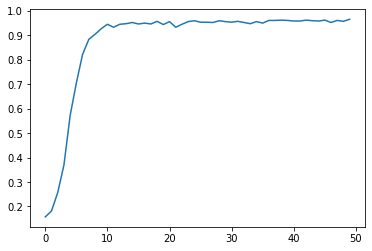

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/fruittraining/train/apple/Image_1.jpg"

img = load_img(filename,target_size=(224,224))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,224,224,3)
img = img.astype('float32')
img = img/255
kq=np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Tao")
if(kq==1):
    print("chuoi")
if(kq==2):
    print("Bap cai")
if(kq==3):
    print("Ca rot")
if(kq==4):
    print("Cauliflower")
if(kq==5):
    print("Chilli pepper")
if(kq==6):
    print("Sweetpotato")
if(kq==7):
    print("tomato")
if(kq==8):
    print("turnip")
if(kq==9):
    print("watermelon")